In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [0]:
data=pd.read_csv('data.txt',header=None)
data.columns=['a','b','c']

In [0]:

def stepFunction(t):
    return np.where(t>=0,1,0).squeeze()

def prediction(X, W, b):
    return stepFunction((np.matmul(X,W)+b))

def perceptronStep(X, y, W, b, learn_rate = 0.01):
  y_hat = prediction(X,W,b)
  W=W-learn_rate*np.matmul((y_hat-y).reshape(1,-1),X).T
  b=b-(learn_rate*np.matmul((y_hat-y).reshape(1,-1),X)).sum()
  return W, b


def trainPerceptronAlgorithm(X, y, learn_rate = 0.01, num_epochs = 25):
    x_min, x_max = min(X.T[0]), max(X.T[0])
    y_min, y_max = min(X.T[1]), max(X.T[1])
    W = np.array(np.random.rand(2,1))
    b = np.random.rand(1)[0] + x_max
    boundary_lines = []
    for i in range(num_epochs):
      W, b = perceptronStep(X, y, W, b, learn_rate)
      boundary_lines.append([float(-W[0]/W[1]), float(-b/W[1])])

    return boundary_lines


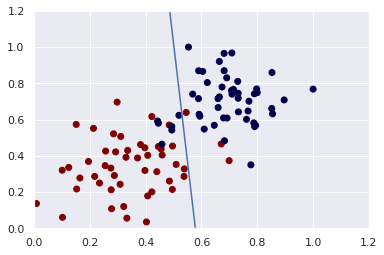

In [68]:
np.random.seed(42)
epochs=25
boundary_lines=trainPerceptronAlgorithm(data[['a','b']].values, data['c'].values, learn_rate = 0.01,num_epochs= epochs)
xx=np.linspace(0,1,20)
plt.scatter(data[['a']],data[['b']],c=data[['c']].values,cmap='seismic')
plt.plot(xx*boundary_lines[epochs-1][0]+boundary_lines[epochs-1][1])
plt.xlim((0,1.2))
plt.ylim((0,1.2))
plt.show()

In [0]:
%matplotlib inline
from matplotlib import animation, rc
from IPython.display import HTML

In [0]:
def animate(i):
  ax.clear()
  xx=np.linspace(0,1,20)
  ax.scatter(data[['a']],data[['b']],c=data[['c']].values,cmap='seismic')
  for j in range(i):
    ax.plot(xx*boundary_lines[j][0]+boundary_lines[j][1],'green')
  ax.plot(xx*boundary_lines[i][0]+boundary_lines[i][1],'blue')
  ax.text(0.12,1,'slope : '+str(boundary_lines[i][0]))
  ax.text(0.12,0.95,'b : '+str(boundary_lines[i][1]))
  plt.xlim((0,1.2))
  plt.ylim((0,1.2))
  #ax.plot()
  return ax


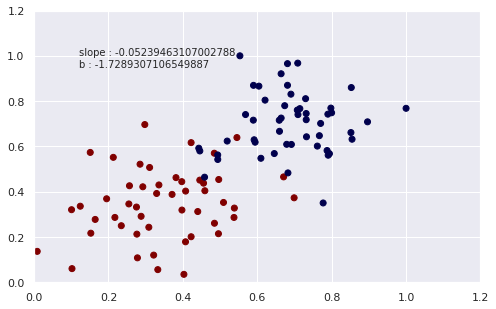

In [75]:
figg=plt.figure(figsize=(8,5))
ax=plt.gca()
anim = animation.FuncAnimation(figg, animate,frames=np.arange(0,25,1),interval=500 ,blit=False)
HTML(anim.to_html5_video())